Project Machine Learning

Kelas : LA01

Anggota Kelompok :
- Michael Kosasih - 2440009364
- Stanley Figo - 2440010416
- Surya Immanuel - 2440026875

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path = "Desktop\cuaca_jakarta.csv"
weather = pd.read_csv(csv_path,index_col="DATE")

In [2]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1974-05-18,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",0.0,79,NaN,NaN
1974-05-30,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",0.0,78,NaN,NaN
1974-08-24,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",0.0,79,NaN,NaN
1974-09-09,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",0.0,76,NaN,NaN
1974-12-02,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",0.0,83,NaN,NaN
...,...,...,...,...,...,...
2022-06-09,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",NaN,80,86.0,NaN
2022-06-10,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",NaN,85,93.0,77.0
2022-06-11,IDM00096741,"JAKARTA TANJUNG PRIOK, ID",NaN,84,90.0,77.0


In [3]:
weather.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP       7088
TAVG          0
TMAX       2495
TMIN       3276
dtype: int64

In [4]:
weather["target"] = weather.shift(-1)["TMAX"]

<AxesSubplot:>

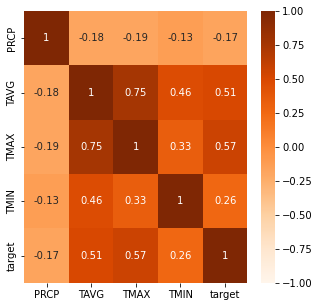

In [5]:
#Feature Selection using Correlation Matrix with Heatmap
matrixcorr = weather.corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrixcorr,vmin=-1,vmax=1,center=0,annot=True,cmap = 'Oranges')

In [6]:
core_weather = weather[["TAVG","TMAX", "TMIN"]].copy()
core_weather.columns = ["temp_avg","temp_max", "temp_min"]

In [7]:
core_weather.apply(pd.isnull).sum()

temp_avg       0
temp_max    2495
temp_min    3276
dtype: int64

In [8]:
core_weather = core_weather.fillna(method="ffill")

In [9]:
core_weather.apply(pd.isnull).sum()

temp_avg     0
temp_max    36
temp_min     8
dtype: int64

In [10]:
core_weather = core_weather.dropna()

In [11]:
core_weather.apply(pd.isnull).sum()

temp_avg    0
temp_max    0
temp_min    0
dtype: int64

In [12]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [13]:
core_weather["temp_avg"] = (core_weather["temp_avg"]-32) * 5/9
core_weather["temp_max"] = (core_weather["temp_max"]-32) * 5/9
core_weather["temp_min"] = (core_weather["temp_min"]-32) * 5/9
core_weather["target"] = (core_weather["target"]-32) * 5/9

In [14]:
core_weather

,temp_avg,temp_max,temp_min,target
DATE,,,,
1975-07-26,28.333333,31.111111,22.777778,31.111111
1975-07-31,27.222222,31.111111,22.777778,31.111111
1975-08-03,28.888889,31.111111,22.777778,31.111111
1975-08-08,31.666667,31.111111,22.777778,31.111111
1975-08-09,30.000000,31.111111,22.777778,31.111111
...,...,...,...,...
2022-06-09,26.666667,30.000000,26.111111,33.888889
2022-06-10,29.444444,33.888889,25.000000,32.222222
2022-06-11,28.888889,32.222222,25.000000,31.666667


In [15]:
core_weather = core_weather.iloc[:-1,:].copy()

In [16]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [17]:
predictors = ["temp_avg", "temp_max", "temp_min"]

In [18]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [19]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [20]:
Ridge(alpha=0.1)
predictions = reg.predict(test[predictors])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Mean Absolute Error: ",mean_absolute_error(test["target"], predictions))

Mean Absolute Error:  0.8760784447805962


In [22]:
print("Mean Squared Error : ",mean_squared_error(test["target"], predictions))

Mean Squared Error :  1.4711111176532117


In [23]:
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(test["target"], predictions)))

Root Mean Square Error :  1.2128936959409145


In [24]:
print("R2 Score : ",r2_score(test["target"], predictions))

R2 Score :  0.23809656608194463


In [25]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

<AxesSubplot:xlabel='DATE'>

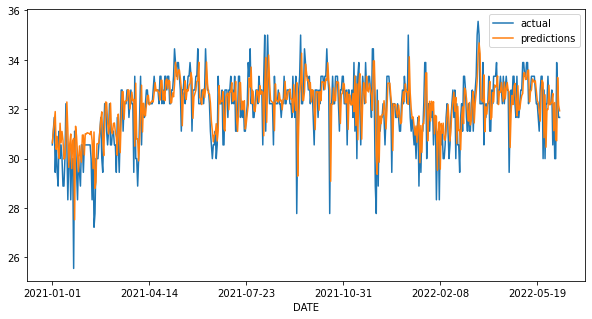

In [26]:
combined.plot(figsize=(10,5))

In [27]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 7.500437287541345
Coefficients: 
 [0.03853547 0.65836272 0.09358034]


In [28]:
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
canvas1 = tk.Canvas(root, width = 500, height = 400)
canvas1.pack()

In [29]:
# Tittle
label_title = tk.Label(root, text="Project Machine Learning", justify = 'center', font=('bold'))
canvas1.create_window(260, 20, window=label_title)
# Kelas
label_1 = tk.Label(root, text="Kelas : LA01", justify = 'center')
canvas1.create_window(260, 40, window=label_1)
# Anggota Kelompok
label_2 = tk.Label(root, text="Anggota Kelompok\n1. Michael Kosasih - 2440009364\n2. Stanley Figo - 2440010416\n3. Surya Immanuel - 2440026875", justify = 'center')
canvas1.create_window(260, 80, window=label_2)

3

In [30]:
#Predict
label1 = tk.Label(root, text='Average Temperature (°C): ')
canvas1.create_window(120, 130, window=label1)
entry1 = tk.Entry (root)
canvas1.create_window(270, 130, window=entry1)

label2 = tk.Label(root, text='Maximum Temperature (°C): ')
canvas1.create_window(120, 150, window=label2)
entry2 = tk.Entry (root)
canvas1.create_window(270, 150, window=entry2)

label3 = tk.Label(root, text='Minimum Temperature (°C): ')
canvas1.create_window(120, 170, window=label3)
entry3 = tk.Entry (root)
canvas1.create_window(270, 170, window=entry3)

def values(): 
    global temp_avg #our 1st input variable
    temp_avg = float(entry1.get()) 
    
    global temp_max #our 2nd input variable
    temp_max = float(entry2.get()) 
    
    global temp_min #our 3nd input variable
    temp_min = float(entry3.get()) 
    
    Prediction_result  = ('Predicted Tomorrow Maximum Temperature (°C): ', reg.predict([[temp_avg ,temp_max, temp_min]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 230, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 200, window=button1)

10

In [31]:
#Evaluation Matrix
label_title2 = tk.Label(root, text="Evaluation Matrix", justify = 'center', font=('bold'))
canvas1.create_window(260, 260, window=label_title2)
# MAE
MAE = ('Mean Absolute Error: ', mean_absolute_error(test["target"], predictions))
label_MAE = tk.Label(root, text=MAE, justify = 'center')
canvas1.create_window(260, 280, window=label_MAE)
# MSE
MSE = ('Mean Squared Error : ', mean_squared_error(test["target"], predictions))
label_MSE = tk.Label(root, text=MSE, justify = 'center')
canvas1.create_window(260, 300, window=label_MSE)
# RMSE
RMSE = ('Root Mean Square Error : ', np.sqrt(mean_squared_error(test["target"], predictions)))
label_RMSE = tk.Label(root, text=RMSE, justify = 'center')
canvas1.create_window(260, 320, window=label_RMSE)\
# R2 Score
R2 = ('R2 Score : ', r2_score(test["target"], predictions))
label_R2 = tk.Label(root, text=R2, justify = 'center')
canvas1.create_window(260, 340, window=label_R2)
# Intercept
Intercept_result = ('Intercept: ', reg.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 360, window=label_Intercept)
# Coefficients
Coefficients_result  = ('Coefficients: ', reg.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 380, window=label_Coefficients)

17

In [32]:
figure = plt.Figure(figsize=(10,4), dpi=100)
ax = figure.add_subplot(111)
chart_type = FigureCanvasTkAgg(figure, root)
chart_type.get_tk_widget().pack()
combined.plot(legend=True, ax=ax)
ax.set_ylabel('Temperature °C')
ax.set_title('Tomorrow maximum temperature')

Text(0.5, 1.0, 'Tomorrow maximum temperature')

In [33]:
root.mainloop()